In [1]:
import sys, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

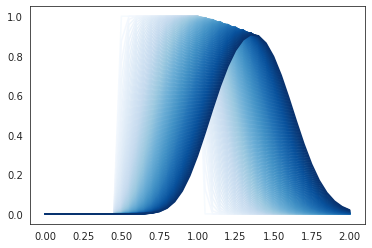

In [55]:
# 1D linear convection
n_x = 41
dx = 2 / (n_x - 1)
n_t = 100
dt = 0.025
c = 0.25

sns.set_palette('Blues', n_t)

# initial conditions
u = np.zeros((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 1
plt.plot(np.linspace(0, 2, n_x), u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
    plt.plot(np.linspace(0, 2, n_x), u[n])

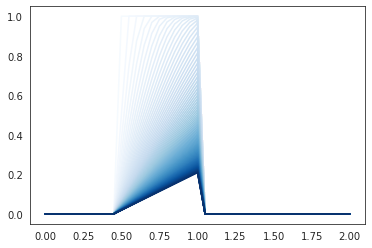

In [56]:
# 1D nonlinear convection
n_x = 41
dx = 2 / (n_x - 1)
n_t = 100
dt = 0.025

sns.set_palette('Blues', n_t)

# initial conditions
u = np.zeros((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 1
plt.plot(np.linspace(0, 2, n_x), u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:] = u[n-1,1:] - u[n-1,1:] * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
    plt.plot(np.linspace(0, 2, n_x), u[n])

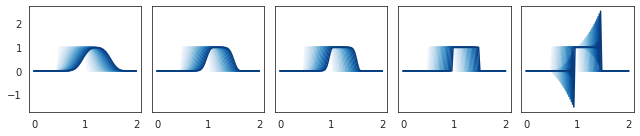

In [61]:
# experiment with grid size

def linear_convect(n_x, ax):
    dx = 2 / (n_x - 1)
    n_t = 20
    dt = 0.025
    c = 1

    sns.set_palette('Blues', n_t)

    # initial conditions
    u = np.zeros((n_t, n_x))
    u[0,int(0.5/dx):int(1/dx+1)] = 1
    ax.plot(np.linspace(0, 2, n_x), u[0])

    # finite differences
    for n in range(1, n_t):
        u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
        ax.plot(np.linspace(0, 2, n_x), u[n])

fig, axes = plt.subplots(1, 5, figsize=(9,2), sharey=True)
linear_convect(41, axes[0])
linear_convect(61, axes[1])
linear_convect(71, axes[2])
linear_convect(81, axes[3])
linear_convect(85, axes[4])
fig.tight_layout()

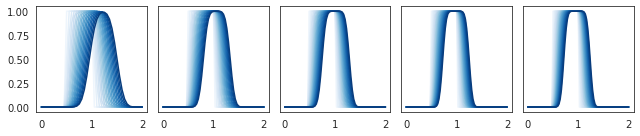

In [62]:
# use Courant number to ensure stability
def linear_convect(n_x, ax):
    dx = 2 / (n_x - 1)
    n_t = 20
    c = 1
    sigma = 0.5 # how do you determine this?
    dt = sigma * dx / c

    sns.set_palette('Blues', n_t)

    # initial conditions
    u = np.zeros((n_t, n_x))
    u[0,int(0.5/dx):int(1/dx+1)] = 1
    ax.plot(np.linspace(0, 2, n_x), u[0])

    # finite differences
    for n in range(1, n_t):
        u[n,1:] = u[n-1,1:] - c * (u[n-1,1:] - u[n-1,:-1]) * dt/dx
        ax.plot(np.linspace(0, 2, n_x), u[n])

fig, axes = plt.subplots(1, 5, figsize=(9,2), sharey=True)
linear_convect(41, axes[0])
linear_convect(61, axes[1])
linear_convect(71, axes[2])
linear_convect(81, axes[3])
linear_convect(85, axes[4])
fig.tight_layout()

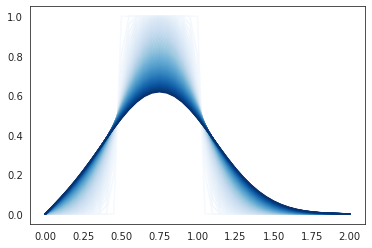

In [68]:
# 1D diffusion
n_x = 41
dx = 2 / (n_x - 1)
n_t = 100

nu = 0.3 # viscosity parameter
sigma = .2 # sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu

sns.set_palette('Blues', n_t)

# initial conditions
u = np.zeros((n_t, n_x))
u[0,int(0.5/dx):int(1/dx+1)] = 1
plt.plot(np.linspace(0, 2, n_x), u[0])

# finite differences
for n in range(1, n_t):
    u[n,1:-1] = u[n-1,1:-1] + nu * (u[n-1,2:] + u[n-1,:-2] - 2*u[n-1,1:-1] ) * dt/dx**2
    plt.plot(np.linspace(0, 2, n_x), u[n])

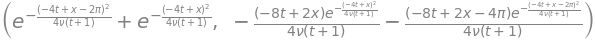

In [69]:
# Burgers' equation
import sympy
sympy.init_printing(use_latex=True)

x, nu, t = sympy.symbols('x nu t')
phi = (
    sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + 
    sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1)))
)
phi_prime = phi.diff(x)

u = -2*nu*(phi_prime / phi) + 4
u_func = sympy.utilities.lambdify((t, x, nu), u)
phi, phi_prime

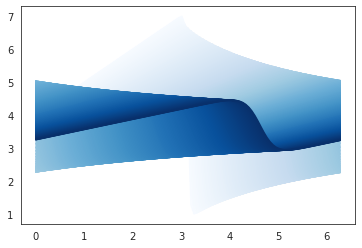

In [77]:
n_x = 101
n_t = 500
dx = 2 * np.pi / (n_x - 1)
nu = 0.07
dt = dx * nu

sns.set_palette('Blues', n_t)

# initial conditions
x = np.linspace(0, 2*np.pi, n_x)
u = np.zeros((n_t, n_x))
u[0] = [u_func(0, x0, nu) for x0 in x]
plt.plot(x, u[0])

# finite differences
for n in range(1, n_t):
    i = np.arange(n_x)
    u[n,:] = (
        u[n-1] -
        u[n-1] * (u[n-1] - u[n-1,(i-1)%n_x]) * dt/dx +
        nu * (u[n-1,(i+1)%n_x] + u[n-1,(i-1)%n_x] - 2*u[n-1,:] ) * dt/dx**2
    )
    plt.plot(x, u[n])